## **Chapter 5: RESAMPLING METHODS**
> This chapter includes two of the most commonly used resampling methods, ***cross-validation*** and the ***bootstrap***.

Code Sources:

* **Model Assessment**: the process of evaluating a model's performance.
* **Model Selection**: the process of selecting the proper level of flexibility for a model.

###**5.1 Cross-Validation**

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Importing the data
auto_url="https://raw.githubusercontent.com/junyanyao/ISLR_Python/master/Dataset/Auto.csv"
auto=pd.read_csv(auto_url)

In [4]:
#Checking Missing Values
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [5]:
#Dropping out the Null
auto=auto.dropna()
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


####**5.1.1 The Validation Set Approach**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [17]:
auto1=auto.copy()
auto1['hp']=auto1.horsepower.replace('?',None,regex=True).astype(float)
auto1

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,hp
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,130.0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,165.0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,150.0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,150.0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,140.0
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,86.0
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,52.0
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,84.0
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,79.0


In [19]:
x=auto1['hp']
y=auto1['mpg']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=30)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
#choose different degree of Polynomial
poly=None
mse=[]
x_poly=None
for i in range(1,10):
    poly=PolynomialFeatures(degree=i)
    x_poly=poly.fit_transform(x[:,None])
    x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.5,random_state =1)
    ols=LinearRegression()
    ols.fit(x_train,y_train)
    pred=ols.predict(x_test)
    mse.append(mean_squared_error(y_test, pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array be

In [22]:
mse

[24.22263909181256,
 18.85447264309375,
 19.092464000245702,
 19.404878961249604,
 18.82206609842061,
 18.92572614664443,
 18.882523853939393,
 18.846041012894034,
 18.60066229784573]

Text(0.5, 0, 'Degree of Polynomial')

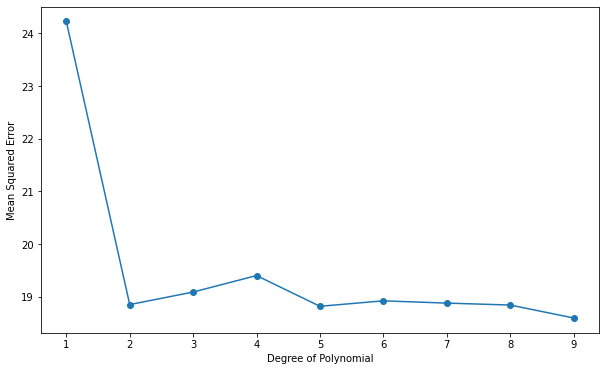

In [23]:
plt.figure(figsize=(10,6),facecolor='w')
plt.plot(range(1,10),mse,'-o')
plt.ylabel('Mean Squared Error')
plt.xlabel('Degree of Polynomial')

In [ ]:
p_order=np.arange(1,11)
r_state=np.arange(1,11)
X,Y=np.meshgrid(p_order,r_state,indexing='ij')
mse2=np.zeros((p_order.size,r_state.size))

for (i,j), v in np.ndenumerate(mse2):
    poly=PolynomialFeatures(degree=int(X[i,j]))
    x_poly=poly.fit_transform(x[:,None])
    x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size =0.5,random_state=Y[i,j])
    ols=LinearRegression()
    ols.fit(x_train,y_train)
    pred=ols.predict(x_test)
    mse2[i,j]=mean_squared_error(y_test, pred)

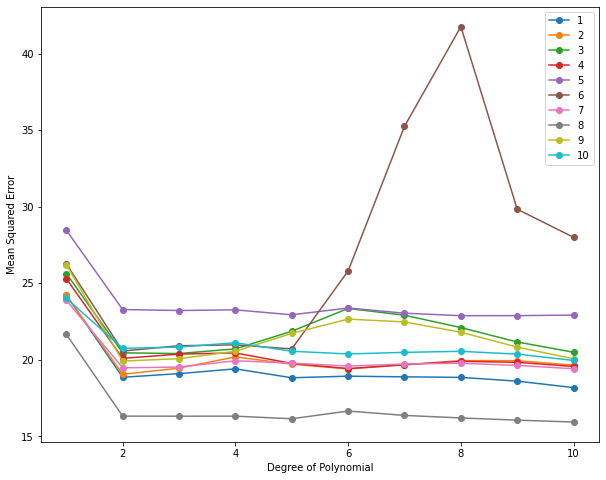

In [26]:
plt.figure(figsize=(10,8),facecolor='w')
plt.plot(X,mse2,'-o')
plt.ylabel('Mean Squared Error')
plt.xlabel('Degree of Polynomial')
plt.legend(r_state)

####**5.1.2 Leave-One-Out Cross-Validation**

We used LOOCV on the `Auto` data set in order to obtain an estimate of the test set MSE that results from fitting a linear regression model to predict `mpg` using polynomial functions of `horsepower`.

The LOOCV estimate for the test MSE is the average of these n test error estimates:

$CV_{(n)}=\frac{1}{n}\sum_{i=1}^{n}MSE_i$


In [28]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [29]:
loocv=LeaveOneOut()
loocv.get_n_splits(auto1)
lm=LinearRegression()
mse3=[]
for i in p_order:
    poly=PolynomialFeatures(degree= i)
    x_poly=poly.fit_transform(x[:,None])
    mse=(cross_val_score(lm,x_poly, y,cv =loocv,scoring='neg_mean_squared_error').mean())
    mse3.append(mse)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array be

Text(0.5, 1.0, 'Leave-one-out CV error curve')

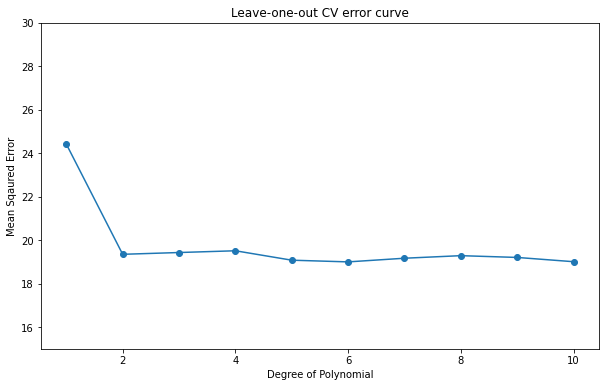

In [30]:
plt.figure(figsize=(10,6),facecolor='w')
plt.plot(p_order,np.array(mse3)*(-1),'-o')
plt.ylabel('Mean Sqaured Error')
plt.xlabel('Degree of Polynomial')
plt.ylim(15,30)
plt.title('Leave-one-out CV error curve')

####**5.1.3 k-Fold Cross-Validation**

In [33]:
import sklearn.linear_model as skl_lm
from sklearn.model_selection import KFold

In [35]:
regr=skl_lm.LinearRegression()
kfoldcv_scores=list()

for p in p_order:
    poly=PolynomialFeatures(p)
    X_poly=poly.fit_transform(auto1.hp.values.reshape(-1,1))
    #with shuffle=True we get much better mean and std
    #but then each train/test split is different across models
    kfold=KFold(n_splits=10,shuffle=False)
    score=cross_val_score(regr,X_poly,auto1.mpg,cv=kfold,scoring='neg_mean_squared_error')
    kfoldcv_scores.append((-score.mean(),score.std()))
kfoldcv_scores=np.array(kfoldcv_scores)

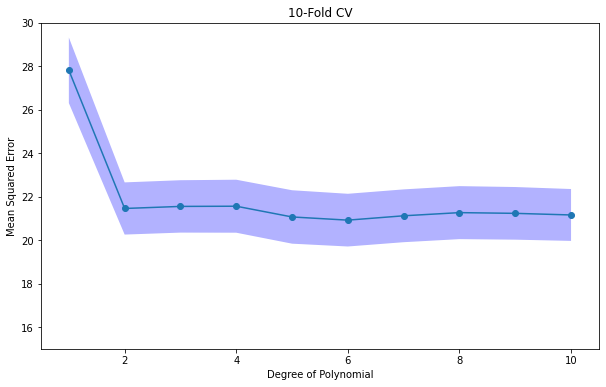

In [38]:
plt.figure(figsize=(10,6),facecolor='w')
plt.plot(p_order, kfoldcv_scores[:,0],'-o')
plt.title('10-Fold CV')
plt.ylabel('Mean Squared Error')
plt.ylim(15,30)
plt.xlabel('Degree of Polynomial')
plt.xlim(0.5, 10.5)
plt.xticks(range(2, 11, 2));
plt.fill_between(p_order,kfoldcv_scores[:,0]+0.1*kfoldcv_scores[:,1],
                 kfoldcv_scores[:,0]-0.1*kfoldcv_scores[:,1],
                 facecolor='blue',alpha=0.3);

####**5.1.4 Bias-Variance Trade-Off for k-Fold Cross Validation**

###**5.2 The Bootstrap**

###**5.3 Labs**